# Analýza dat pomocí Pandas

![](http://www.priroda.cz/clanky/foto/panda3.jpg)

Nejprve naimportujeme potřebné balíčky.
Pokud tyto balíčky nemáte, nainstalujte je pomocí následujících příkazů v příkazovém řádku.

`sudo apt-get install python3-pandas`

`sudo apt-get install python3-matplotlib`

Společně s `pandas` by měl být nainstalovaný baliček `numpy`. Pokud ne, nainstalujte jej pomocí následujícího příkazu:

`sudo apt-get install python-numpy`

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl

Načteme data do DataFrame a pojmenujeme sloupce.

In [3]:
df = pd.read_table("/home/nasta/Documents/python_bio/apples/apple.genes", header=None)
df.columns = ["Gen", "Transkript", "Chromozom", "Retezec", "Start", "Stop", "Exony"] 

Podíváme se na začátek a konec tabulky.

In [3]:
df.head()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony
0,MDP0000303933,MDP0000303933,chr1,-,4276,5447,"(4276-4368,4423-4542,4733-4911,5321-5447)"
1,MDP0000223353,MDP0000223353,chr1,+,77339,79628,"(77339-77399,77484-77524,77589-77630,78413-784..."
2,MDP0000322928,MDP0000322928,chr1,+,103533,103686,(103533-103686)
3,MDP0000151845,MDP0000151845,chr1,-,121369,122541,(121369-122541)
4,MDP0000307409,MDP0000307409,chr1,-,123810,125906,"(123810-125614,125804-125906)"


In [4]:
df.tail()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony
5451,MDP0000165503,MDP0000165503,chr3,-,39871832,39875913,"(39871832-39871939,39872744-39872807,39872992-..."
5452,MDP0000575784,MDP0000575784,chr3,-,39877141,39877811,"(39877141-39877434,39877686-39877811)"
5453,MDP0000575784,MDP0000575784.1,chr3,-,39877141,39877811,"(39877141-39877434,39877500-39877550,39877686-..."
5454,MDP0000647499,MDP0000647499,chr3,+,39898182,39898847,(39898182-39898847)
5455,MDP0000216874,MDP0000216874,chr3,-,39902674,39906448,"(39902674-39902837,39902954-39903045,39903532-..."


Zjistíme, jaký datový typ má naše tabulka.

In [5]:
type(df)

pandas.core.frame.DataFrame

Zjistíme počet řádků a sloupců pomocí `df.shape`

In [6]:
df.shape

(5456, 7)

Podíváme se na to, jaké datové typy obsahuje naše tabulka.

In [7]:
df.dtypes

Gen           object
Transkript    object
Chromozom     object
Retezec       object
Start          int64
Stop           int64
Exony         object
dtype: object

Tady je seznam datových typů v `DataFrame`

Pandas Type | Native Python Type | Description
------------ | ----------------- | -----------
object | string |The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).
int64 | int | Numeric characters. 64 refers to the memory allocated to hold this character.
float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal.
datetime64, timedelta[ns] | N/A (but see the datetime module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments.

Převzato z [Data Carpentry](http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format)

Přidáme sloupec "Počet_exonů".

In [9]:
df["Pocet_exonu"] = df["Exony"].str.count("-")
df.head()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu
0,MDP0000303933,MDP0000303933,chr1,-,4276,5447,"(4276-4368,4423-4542,4733-4911,5321-5447)",4
1,MDP0000223353,MDP0000223353,chr1,+,77339,79628,"(77339-77399,77484-77524,77589-77630,78413-784...",7
2,MDP0000322928,MDP0000322928,chr1,+,103533,103686,(103533-103686),1
3,MDP0000151845,MDP0000151845,chr1,-,121369,122541,(121369-122541),1
4,MDP0000307409,MDP0000307409,chr1,-,123810,125906,"(123810-125614,125804-125906)",2


Přidáme sloupec "Velikost_genu".

In [10]:
df["Velikost_genu"] = df["Stop"]-df["Start"]
df.head()

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
0,MDP0000303933,MDP0000303933,chr1,-,4276,5447,"(4276-4368,4423-4542,4733-4911,5321-5447)",4,1171
1,MDP0000223353,MDP0000223353,chr1,+,77339,79628,"(77339-77399,77484-77524,77589-77630,78413-784...",7,2289
2,MDP0000322928,MDP0000322928,chr1,+,103533,103686,(103533-103686),1,153
3,MDP0000151845,MDP0000151845,chr1,-,121369,122541,(121369-122541),1,1172
4,MDP0000307409,MDP0000307409,chr1,-,123810,125906,"(123810-125614,125804-125906)",2,2096


Podíváme se na popisnou statistiku numerických sloupců pomocí `df.describe`.

V našem případě jsou to jenom 4 sloupce, z čehož popisná statistika dává smysl jenom u sloupců "Počet_exonů" a "Velikost_genu".

In [12]:
df.describe()

,Start,Stop,Pocet_exonu,Velikost_genu
count,5456.000000,5456.000000,5456.000000,5456.000000
mean,19787426.791972,19790303.794172,5.077163,2877.002199
std,12017288.385368,12017296.260696,4.906019,2916.799005
min,4276.000000,5447.000000,1.000000,90.000000
25%,8825954.500000,8829904.500000,2.000000,911.750000
50%,19565861.500000,19570904.000000,3.000000,2034.500000
75%,31200448.500000,31202358.500000,7.000000,3792.750000
max,40159902.000000,40163103.000000,63.000000,30951.000000


In [11]:
df["Pocet_exonu"].describe()

count    5456.000000
mean        5.077163
std         4.906019
min         1.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        63.000000
Name: Pocet_exonu, dtype: float64

# Cvičení

Načtěte soubor `/home/ja/Data/data-shell/data/planets.txt`

1. Přejmenujte sloupce
2. Zjistěte počet sloupců a řádků
3. Udělejte popisnou statistiku

In [18]:
planets = pd.read_table('/home/nasta/Documents/python_bio/data-shell/data/planets.txt', sep=",", usecols=[0,1,2,3])
planets.head()

,Planet Name,Pl. Mass,Pl. Radius,Pl. Period
0,55 Cnc e,0.027,0.194,0.736545
1,CoRoT-1 b,1.030,1.490,1.508956
2,CoRoT-10 b,2.750,0.970,13.240600
3,CoRoT-11 b,2.330,1.430,2.994330
4,CoRoT-12 b,0.917,1.440,2.828042


In [19]:
planets.shape

(229, 4)

In [20]:
planets.describe()

,Pl. Mass,Pl. Radius,Pl. Period
count,218.000000,229.000000,229.000000
mean,1.864573,0.953409,13.087551
std,3.061974,0.461101,35.579982
min,0.003000,0.051000,0.453285
25%,0.431500,0.490000,2.788491
50%,0.857500,1.090000,3.897130
75%,1.937000,1.281000,7.641590
max,21.660000,2.037000,289.862300


In [28]:
planets["Pl. Mass"].sort_values()

141     0.003000
140     0.006000
73      0.007237
139     0.009000
87      0.009700
69      0.013530
67      0.014300
19      0.015100
71      0.019190
66      0.020000
22      0.020000
80      0.021700
126     0.022000
72      0.026430
84      0.027000
0       0.027000
89      0.033000
70      0.042500
88      0.045000
85      0.051000
82      0.052000
81      0.054000
41      0.059000
86      0.060000
68      0.063000
83      0.064000
23      0.073700
119     0.077000
25      0.081000
90      0.110000
         ...    
149     4.340000
183     4.590000
109     4.700000
108     6.800000
35      7.246000
164     7.341000
6       7.600000
76      8.400000
34      8.740000
106     9.100000
99      9.110000
153     9.700000
168    10.430000
226    11.790000
95     12.700000
100    13.800000
107    17.000000
133    18.000000
15     21.660000
112          NaN
113          NaN
114          NaN
115          NaN
116          NaN
127          NaN
128          NaN
135          NaN
136          N

Vybereme sloupce

In [14]:
df.Gen

0       MDP0000303933
1       MDP0000223353
2       MDP0000322928
3       MDP0000151845
4       MDP0000307409
5       MDP0000153869
6       MDP0000187420
7       MDP0000286949
8       MDP0000482754
9       MDP0000726869
10      MDP0000130529
11      MDP0000834450
12      MDP0000135949
13      MDP0000195757
14      MDP0000025650
15      MDP0000025650
16      MDP0000918616
17      MDP0000907499
18      MDP0000229381
19      MDP0000229382
20      MDP0000648408
21      MDP0000246923
22      MDP0000419196
23      MDP0000434787
24      MDP0000312784
25      MDP0000423722
26      MDP0000413077
27      MDP0000170030
28      MDP0000478153
29      MDP0000249932
            ...      
5426    MDP0000161050
5427    MDP0000930498
5428    MDP0000626322
5429    MDP0000265670
5430    MDP0000163387
5431    MDP0000163388
5432    MDP0000123032
5433    MDP0000317575
5434    MDP0000251717
5435    MDP0000498699
5436    MDP0000209004
5437    MDP0000367689
5438    MDP0000209003
5439    MDP0000498703
5440    MD

In [30]:
df[["Gen", "Start", "Stop"]]

,Gen,Start,Stop
0,MDP0000303933,4276,5447
1,MDP0000223353,77339,79628
2,MDP0000322928,103533,103686
3,MDP0000151845,121369,122541
4,MDP0000307409,123810,125906
5,MDP0000153869,135056,135555
6,MDP0000187420,157313,161160
7,MDP0000286949,161876,162460
8,MDP0000482754,178517,181369
9,MDP0000726869,218660,220437


Seřadíme sestupně řádky dle velikosti genů a počtu exonů.

In [33]:
df.sort_values(["Velikost_genu", "Pocet_exonu"], ascending=False)

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
3448,MDP0000312088,MDP0000312088,chr2,+,35500600,35531551,"(35500600-35501010,35501120-35501236,35501464-...",50,30951
3953,MDP0000279951,MDP0000279951,chr3,-,5463665,5489261,"(5463665-5463781,5463888-5464147,5489147-5489261)",3,25596
3674,MDP0000321472,MDP0000321472,chr2,-,39915011,39940155,"(39915011-39915090,39915321-39915610,39916106-...",48,25144
4465,MDP0000310012,MDP0000310012,chr3,+,15197957,15221624,"(15197957-15198118,15198432-15198497,15198597-...",49,23667
2528,MDP0000259414,MDP0000259414,chr2,-,12061728,12085345,"(12061728-12061847,12062166-12062378,12062466-...",37,23617
647,MDP0000271982,MDP0000271982,chr1,+,20755546,20778581,"(20755546-20755625,20757466-20757520,20757620-...",20,23035
2515,MDP0000266474,MDP0000266474,chr2,-,11939032,11962051,"(11939032-11939556,11939651-11940202,11940370-...",33,23019
1570,MDP0000322409,MDP0000322409,chr1,-,35590702,35613351,"(35590702-35592167,35592285-35592718,35592827-...",63,22649
1052,MDP0000262883,MDP0000262883,chr1,+,28698320,28719998,"(28698320-28699220,28699392-28699573,28700523-...",20,21678
1952,MDP0000283610,MDP0000283610,chr2,-,4040399,4061683,"(4040399-4040536,4041164-4041287,4041371-40414...",35,21284


# Cvičení

Seřaďte `planets.txt` dle:

1. Hmotnosti
2. Poloměru

In [34]:
planets.sort_values(["Pl. Mass", "Pl. Radius"], ascending=False)

,Planet Name,Pl. Mass,Pl. Radius,Pl. Period
15,CoRoT-3 b,21.660000,1.01000,4.256800
133,KOI-423 b,18.000000,1.22000,21.087400
107,Kepler-30 d,17.000000,0.96000,143.213000
100,Kepler-27 c,13.800000,0.44000,31.330900
95,Kepler-25 b,12.700000,0.23000,6.238500
226,XO-3 b,11.790000,1.21700,3.191524
168,WASP-18 b,10.430000,1.16500,0.941452
153,SWEEPS-11,9.700000,1.13000,1.796000
99,Kepler-27 b,9.110000,0.36000,15.334800
106,Kepler-30 c,9.100000,1.29000,60.325100


Kolik genů má více než jeden transkript?

In [17]:
sum(df["Gen"].value_counts() > 1)

3

Které geny to jsou?

In [19]:
df.set_index("Gen").index.get_duplicates()

['MDP0000025650', 'MDP0000301110', 'MDP0000575784']

Zobrazit jenom ty geny, které mají více než jeden transkript.

In [21]:
df.loc[df["Gen"].isin(df.set_index("Gen").index.get_duplicates())]

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
14,MDP0000025650,MDP0000025650,chr1,+,465389,466698,"(465389-465490,465628-465836,466103-466571,466...",4,1309
15,MDP0000025650,MDP0000025650.2,chr1,+,465389,466698,"(465389-465490,465628-465836,466500-466550,466...",5,1309
2000,MDP0000301110,MDP0000301110,chr2,+,4426543,4430168,"(4426543-4426639,4427651-4427975,4428018-44280...",7,3625
2001,MDP0000301110,MDP0000301110.2,chr2,+,4426543,4430168,"(4426543-4426639,4427651-4427975,4428018-44283...",6,3625
5452,MDP0000575784,MDP0000575784,chr3,-,39877141,39877811,"(39877141-39877434,39877686-39877811)",2,670
5453,MDP0000575784,MDP0000575784.1,chr3,-,39877141,39877811,"(39877141-39877434,39877500-39877550,39877686-...",3,670


Vybereme geny, jejichž transkripty mají více než 7 exonů.

In [22]:
df.loc[df["Pocet_exonu"] > 7]

,Gen,Transkript,Chromozom,Retezec,Start,Stop,Exony,Pocet_exonu,Velikost_genu
13,MDP0000195757,MDP0000195757,chr1,+,335937,342691,"(335937-336135,336603-336667,336808-336928,337...",17,6754
16,MDP0000918616,MDP0000918616,chr1,-,468182,473982,"(468182-468385,468508-468609,469195-469269,469...",8,5800
17,MDP0000907499,MDP0000907499,chr1,-,580436,584704,"(580436-580513,580722-580812,581360-581448,581...",10,4268
18,MDP0000229381,MDP0000229381,chr1,-,599175,606092,"(599175-599633,599835-599936,600243-600290,600...",14,6917
35,MDP0000154720,MDP0000154720,chr1,-,1491692,1495965,"(1491692-1491907,1491992-1492588,1492745-14929...",10,4273
36,MDP0000262337,MDP0000262337,chr1,+,1495631,1500679,"(1495631-1495703,1495836-1495990,1496393-14964...",11,5048
38,MDP0000259751,MDP0000259751,chr1,-,1520637,1526433,"(1520637-1521254,1522336-1522482,1522624-15227...",8,5796
40,MDP0000244990,MDP0000244990,chr1,+,1831559,1840523,"(1831559-1831777,1831922-1832077,1833011-18331...",11,8964
46,MDP0000170466,MDP0000170466,chr1,+,2523750,2528995,"(2523750-2523939,2524312-2524395,2524896-25250...",9,5245
49,MDP0000274009,MDP0000274009,chr1,-,3094382,3100578,"(3094382-3094610,3094774-3094908,3097052-30973...",8,6196


## Cvičení

Vyberte řádky, u kterých:

1. Poloměr planety je větší než Jupiterův
2. Hmotnost je menší než hmotnost Jupiteru

Zapíšeme výslednou tabulku.

In [23]:
df.to_csv("/home/nasta/Documents/python_bio/apples/apple_edited.genes", index=False, sep="\t", encoding="utf-8")

Aby se grafy zobrazovaly v Jupyter Notebooku, použijeme násedující `magic` funkci

In [24]:
%matplotlib inline

Podiváme se na distribuci počtu exonů a velikosti genu

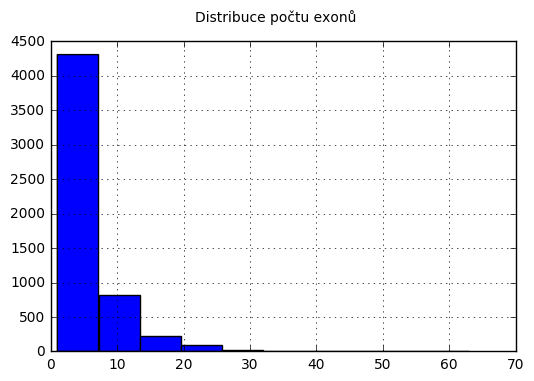

In [25]:
df["Pocet_exonu"].hist(bins=10)
pl.suptitle("Distribuce počtu exonů")

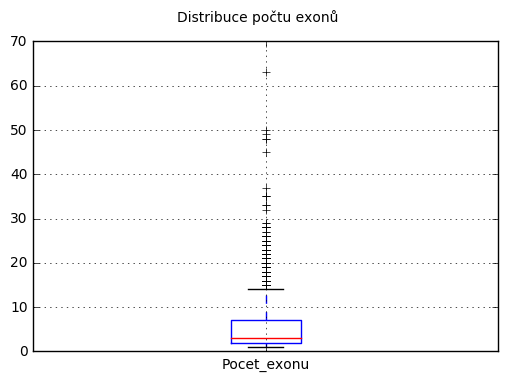

In [26]:
df.boxplot(column="Pocet_exonu", return_type="axes")
pl.suptitle("Distribuce počtu exonů")

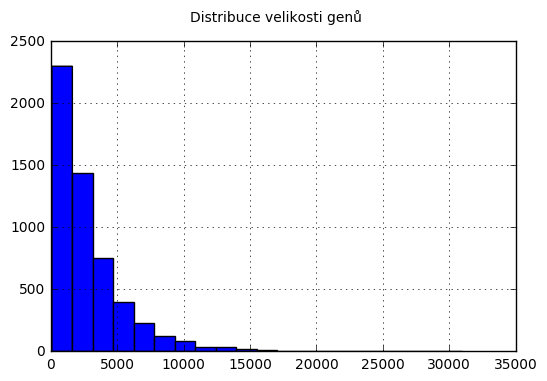

In [27]:
df["Velikost_genu"].hist(bins=20)
pl.suptitle("Distribuce velikosti genů")

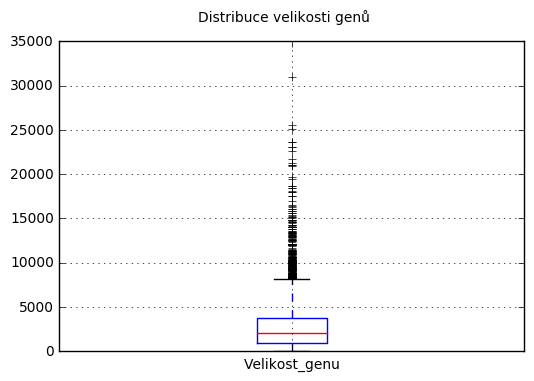

In [28]:
df.boxplot(column="Velikost_genu", return_type="axes")
pl.suptitle("Distribuce velikosti genů")

Vytvoříme bodový graf mezi počtem exonů a velikosti genu a proložíme body přímkou (lineární regrese)

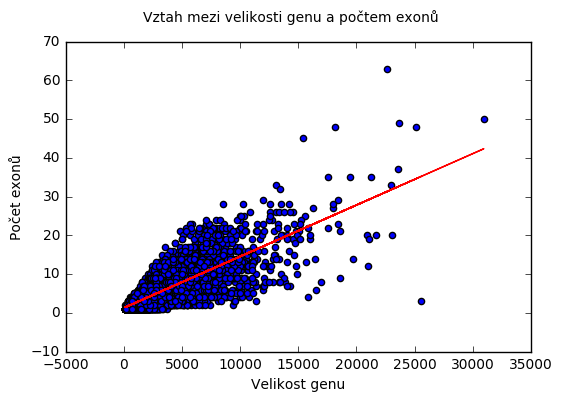

In [29]:
fig,ax = plt.pyplot.subplots()
fit = np.polyfit(df["Velikost_genu"], df["Pocet_exonu"], deg=1)
ax.plot(df["Velikost_genu"],  fit[0] * df["Velikost_genu"] + fit[1], color='red')
ax.scatter(df["Velikost_genu"], df["Pocet_exonu"])
ax.set_xlabel("Velikost genu")
ax.set_ylabel("Počet exonů")
pl.suptitle("Vztah mezi velikosti genu a počtem exonů")

Vytvoříme histogram, kde bude počet exonů rozdělen dle chromozomů

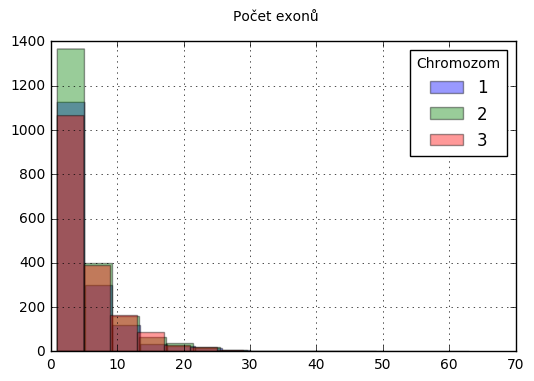

In [31]:
fig, ax = plt.pyplot.subplots()
df[df.Chromozom =="chr1"].Pocet_exonu.hist(alpha=0.4, bins=15)
df[df.Chromozom =="chr2"].Pocet_exonu.hist(alpha=0.4, bins=12)
df[df.Chromozom =="chr3"].Pocet_exonu.hist(alpha=0.4, bins=12)
ax.legend(['1', '2', '3'], title="Chromozom")
pl.suptitle("Počet exonů")

Vytvoříme boxploty počtu exonů a velikosti genu dle chromozomů

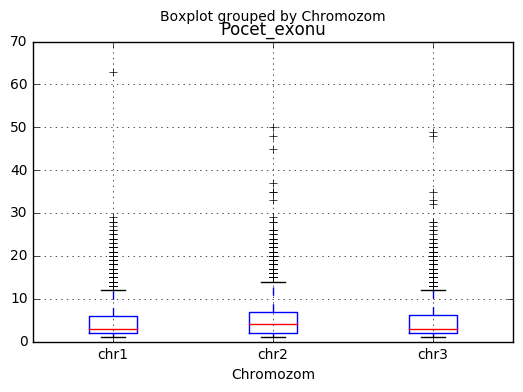

In [32]:
df.boxplot(column="Pocet_exonu", by="Chromozom")

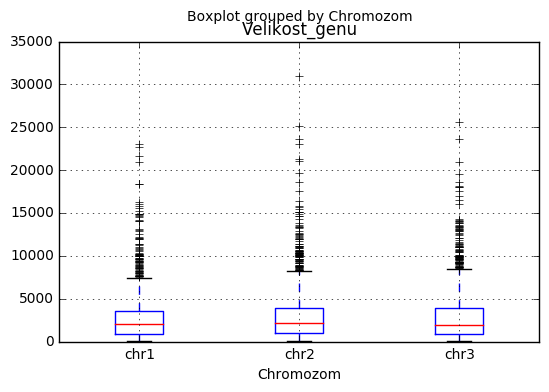

In [33]:
df.boxplot(column="Velikost_genu", by="Chromozom")

## Cvičení

Vytvořte následující grafy:

1. Histogram a boxplot
    1. Poloměr planet
    2. Hmotnost planet
    3. Doby oběhu planety
2. Bodový graf (proložíme body přímkou)
    1. Poloměr a hmotnost planet 
    2. Poloměr a doba oběhu
    3. Hmotnost a doba oběhu